### 第6章：时序差分学习（Temporal-Difference Learning）

第6章是《强化学习》书中非常重要的一章，因为时序差分（TD）学习被认为是强化学习的核心方法之一。它结合了动态规划（Dynamic Programming）和蒙特卡洛方法（Monte Carlo Methods）的优点，既不需要完整的环境模型，又能在交互过程中逐步更新估计。

#### 6.1 TD学习的引入

- **背景**：
  - 在前几章中，DP动态规划需要完整的环境模型（状态转移概率和奖励函数），而MC蒙特卡洛方法则需要等到一个回合（episode）结束后才能更新价值估计。
  - TD学习的目标是解决这两个局限性：它可以在每一步（step-by-step）更新估计，且无需知道环境模型。

- **核心思想**：
  - TD学习通过“时序差分”来更新价值估计，即利用当前估计与下一时刻估计之间的差异（差分）来学习。
  - 与蒙特卡洛方法等待完整回报不同，TD学习基于“自举”（bootstrapping），用当前的价值估计来预测未来的回报。

- **定义**：
  - TD学习的更新规则基于 Bellman 方程，但用采样代替期望。例如，对于状态价值函数 $V(s)$ 的更新：

    $$
    V(s) \leftarrow V(s) + \alpha [r + \gamma V(s') - V(s)]
    $$

    其中：
    - $r$：当前奖励
    - $s'$：下一状态
    - $\gamma$：折扣因子（$0 \leq \gamma < 1$）
    - $\alpha$：学习率
    - $r + \gamma V(s') - V(s)$：时序差分误差（TD error）

#### 6.2 TD(0)算法
- **描述**：
  - TD(0)是最简单的TD学习形式，表示只向前看一步（n=0步）的更新。
  - 智能体在每个时间步观察当前状态 $s$，采取动作 $a$，获得奖励 $r$，进入下一状态 $s'$，然后更新价值估计。

- **伪代码**:
```text
初始化 V(s) 为任意值（如0），对所有状态 s
重复（每个回合）：
    初始化起始状态 s
    重复（每个时间步）：
        根据策略选择动作 a
        执行动作 a，观察奖励 r 和下一状态 s'
        V(s) ← V(s) + α [r + γ V(s') - V(s)]
        s ← s'
    直到 s 为终止状态
```

- **特点**:

    - 在线学习：无需等到回合结束即可更新。
    - 自举：依赖当前的价值估计 $V(s’)$ 来更新 $V(s)$。

- **与蒙特卡洛的对比**：
    - 蒙特卡洛用实际回报 $G_t$ 更新： $V(s) \leftarrow V(s) + \alpha (G_t - V(s))$
	- TD(0)用一步预测代替完整回报，降低了方差但可能引入偏差。


简单来说，期望回报 $V(s)$ 是“从长远来看，平均而言，状态 $s$ 有多好”，
而实际回报 $G_t$ 是“在这一次具体的尝试中，从 $t$ 时刻开始，你最终实际得到了多少（折扣后的）好处”。


#### 6.3 TD学习的优点

- **无需模型**：
    - 规划不同，TD学习通过采样直接从经验中学习，不需要知道状态转移概率或奖励函数。

- **增量更新**：
	- 在线更新使得TD学习适合实时任务或无限长的序列。

- **效率**:
	- 相比蒙特卡洛，TD学习能更快收敛，尤其是在噪声较小的环境中，因为它利用了中间步骤的信息。

#### 6.4 SARSA：一种基于TD的控制方法

- **背景**：
	- TD学习最初用于评估(prediction)给定策略的价值。SARSA将其扩展到控制(control)，即寻找最优策略。

- **定义**：
	- SARSA是一个“在线策略”（on-policy）算法，名字来源于其更新使用的五元组：$(S, A, R, S’, A’)$。
	- 更新规则基于动作价值函数 $Q(s, a)$：
$$
Q(s, a) \leftarrow Q(s, a) + \alpha [r + \gamma Q(s’, a’) - Q(s, a)]
$$


- **伪代码**:
```text
初始化 Q(s, a) 为任意值（如0），对所有状态-动作对 (s, a)
重复（每个回合）：
    初始化状态 s，选择动作 a（基于当前策略，如ε-贪婪）
    重复（每个时间步）：
        执行动作 a，观察奖励 r 和下一状态 s'
        根据当前策略选择下一动作 a'
        Q(s, a) ← Q(s, a) + α [r + γ Q(s', a') - Q(s, a)]
        s ← s', a ← a'
    直到 s 为终止状态
```

- **特点**：
    - 在线性：SARSA在执行策略时更新价值，与实际执行的动作一致。
	- 探索性：通常结合ε-贪婪策略以平衡探索与利用。

#### 6.5 Q-learning：离线策略TD控制

- **定义**：

    - Q-learning是一个“离线策略”（off-policy）算法，目标是直接学习最优动作价值函数 $Q^*(s, a)$。
	- 更新规则：
        $$
        Q(s, a) \leftarrow Q(s, a) + \alpha \left[r + \gamma \max_{a’} Q(s’, a’) - Q(s, a)\right]
        $$


- **伪代码**:
```text
初始化 Q(s, a) 为任意值（如0），对所有状态-动作对 (s, a)
重复（每个回合）：
    初始化状态 s
    重复（每个时间步）：
        根据策略（如ε-贪婪）选择动作 a
        执行动作 a，观察奖励 r 和下一状态 s'
        Q(s, a) ← Q(s, a) + α [r + γ max_a' Q(s', a') - Q(s, a)]
        s ← s'
    直到 s 为终止状态
```


- **与SARSA的区别**：
    - SARSA依赖下一动作 $a’$ 的实际选择（在线策略），而Q-learning假设下一状态的最优动作（离线策略）。
	- Q-learning更激进，可能在某些环境中（如悬崖行走问题）因过于乐观估计而表现不佳。

#### 6.6 TD与蒙特卡洛、动态规划的关系

- 与蒙特卡洛的对比：
  - 蒙特卡洛依赖完整回合的回报，计算实际的 $G_t$，方差较高但无偏差。
  - TD(0)用一步预测，减少方差但引入偏差（因依赖估计值）。
- 与动态规划的对比：
  - 动态规划用期望更新，需要完整模型。
  - TD学习用采样更新，逐步逼近真实价值。
- 统一视角：
  - TD(0)可以看作蒙特卡洛（$n=\infty$）和动态规划（模型已知）的中间形式。

#### 6.7 理论分析与收敛性
- 收敛性：
    - 在适当条件下（如学习率递减、充分探索），TD(0)、SARSA和Q-learning都能收敛到最优解。
    - Q-learning收敛到最优策略的价值函数 $Q^*$，而SARSA收敛到当前策略的价值。
- TD误差：
    - TD误差 $\delta_t = r + \gamma V(s’) - V(s)$ 是学习的核心，反映预测与实际的差距。

#### 6.8 应用与扩展
- 实例：
    - 书中用“随机游走”（Random Walk）示例展示了TD学习的收敛过程。


## 关于三种方法（DP、MC、TD）的总结与思考

动态规划（Dynamic Programming, __DP__）、蒙特卡洛方法（Monte Carlo, __MC__）和时序差分方法（Temporal-Difference, __TD__）是第4、5、6三章中引出的三种主要的强化学习方法。

#### 1. 动态规划（DP）

 _特点：_

- DP方法依赖于完整的环境模型，即要求知道环境的状态转移概率和奖励函数。
- DP使用贝尔曼方程，通过迭代更新状态值来计算最优策略。
- 适用于具有有限状态和动作空间的确定性问题或具有已知动态模型的情况。

_优势：_

- 适合有明确模型的环境，能够在已知的状态转移规则下有效计算最优策略。
- 收敛性强，在每次迭代中逐渐逼近最优值或策略。

_劣势：_

- 依赖于环境模型，无法直接应用于没有模型的情况（即不适合未知环境的在线学习）。
- 在大规模状态空间时，计算开销大（“维度灾难”），难以扩展到高维空间。


#### 2. 蒙特卡洛方法（MC）

_特点：_

- MC方法不需要环境的模型，只需要通过采样完整的轨迹（即一条完整的状态-动作-奖励序列）来估计状态值或动作值。
- 依赖于采样后的实际经验，适合无模型的强化学习环境。

_优势：_

- 无模型要求，可以直接从经验中学习，适合用于不明确的或复杂的环境。
- 可以在环境不确定或存在噪声的情况下收敛，尤其适用于非马尔可夫性决策过程中。

_劣势：_

- 必须等到一个完整的回合结束后才能更新值，无法在每个步骤中逐步学习。
- 在某些稀疏奖励的环境中，MC可能收敛较慢或存在高方差。


#### 3. 时序差分方法（TD）

_特点：_

- TD方法结合了DP和MC的优势，不需要环境模型，但也可以在每个时间步更新价值函数，而不需要等到回合结束。
- 它通过当前经验中的部分反馈更新值函数，因此能够处理在线学习。

_优势：_

- 适合无模型的环境，并且能够在每一步都进行更新，而不必等到整个回合结束。
- 相比MC，TD方法的方差较低，因为它通过一步的预测更新状态值。
- 适合持续的任务，即那些没有明确结束点的任务（如某些控制问题）。

_劣势：_

- 与MC相比，TD方法的偏差更大，因为它依赖于当前的估计值更新，而不是基于实际回报。

__DP__、 __MC__ 和 __TD__ 三者的对比：

| 方法          | 依赖环境模型 | 学习方式       | 更新时机   | 偏差和方差         | 适用场景                  |
|---------------|--------|----------------|------------|--------------------|-----------------------|
| 动态规划（DP） | 需要     | 全局迭代更新   | 每个状态   | 无偏差，但需要环境模型 | 适用于有限状态、已知环境的情况       |
| 蒙特卡洛（MC） | 不需要    | 回合采样更新   | 回合结束时 | 无偏差，但方差大     | 无模型环境，适合回合制终止性任务（如围棋） |
| 时序差分（TD） | 不需要    | 时间步反馈   | 每个时间步 | 有偏差，但方差小     | 无模型环境，适合持续性任务（如机器人）   |

#### 个人思考：

由于已经把三种主要算法的章节都读完了，终于对于他们讲的内容理解得更深刻一些。

其实现代的强化学习算法，往往是这三种方法的结合。比如说，蒙特卡洛方法用于那些任务明确终止的场景，而TD方法适合于持续性任务。可以结合使用这两种方法，尤其是在现代很多场景的学习是多环境或多任务的交互的。

而且这三章主要理解他们的逻辑，而当今更多是采用神经网络来拟合价值函数，这样可以更好的处理高维度的问题。而神经网络的结构，也是可以结合这三种方法的特点来设计的。

所以，这三种方法的理解，对于理解现代强化学习算法的设计思想，还是很有帮助的。 后续的章节中，介绍的概念开始变得越来越接近今天大语言模型的训练方法了。


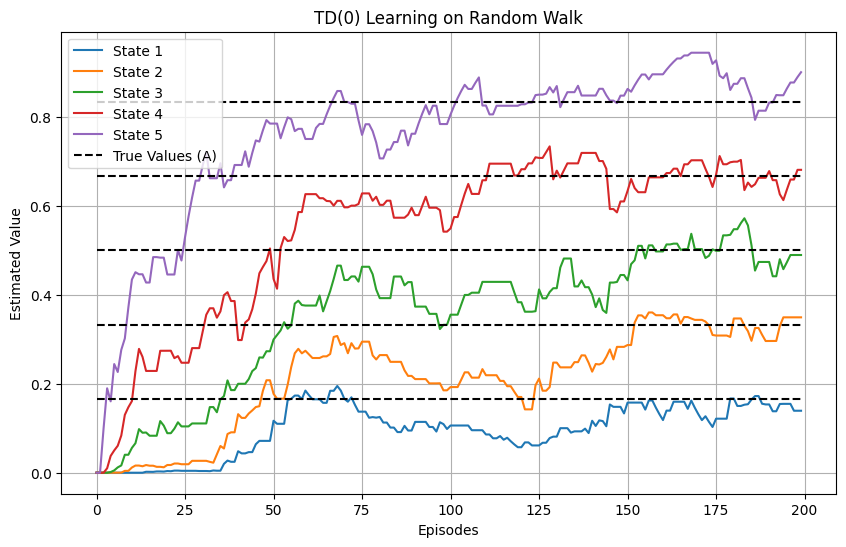

Final Estimated Values: [0.13944567 0.34958293 0.48981635 0.6814365  0.90108534]
True Values: [0.16666667 0.33333333 0.5        0.66666667 0.83333333]


In [5]:
"""
第6章中的“随机游走”（Random Walk）代码示例。展示TD(0)学习的收敛过程。
使用TD(0)算法来估计每个状态的价值函数，然后观察其如何逼近真实值。
"""

import numpy as np
import matplotlib.pyplot as plt

# 参数设置
n_states = 5  # 状态数：A, B, C, D, E (编号1到5)
alpha = 0.1   # 学习率
n_episodes = 200  # 回合数
gamma = 1.0   # 折扣因子（书中示例常设为1）

# 初始化价值函数（除了终止状态外）
V = np.zeros(n_states + 2)  # 状态编号0和6为终止状态，1-5为有效状态
true_V = np.array([0, 1/6, 2/6, 3/6, 4/6, 5/6, 1])  # 真实价值（包含终止状态）

# 记录每次回合后的价值估计，用于绘图
V_history = []

# TD(0)学习
np.random.seed(42)  # 固定随机种子以便复现
for episode in range(n_episodes):
    # state = 3  # 从中间状态C开始（编号3）
    state = np.random.randint(1, n_states + 1)  # 随机初始状态
    while True:
        # 随机选择动作：向左(-1)或向右(+1)
        action = np.random.choice([-1, 1])
        next_state = state + action

        # 检查是否到达终止状态
        if next_state == 0:  # 到达A左侧（终止）
            reward = 0
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])
            break
        elif next_state == n_states + 1:  # 到达E右侧（终止）
            reward = 1
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])
            break
        else:  # 非终止状态
            reward = 0
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])
            state = next_state

    # 记录当前的价值估计
    V_history.append(V[1:n_states + 1].copy())

# 可视化结果
plt.figure(figsize=(10, 6))
for i in range(n_states):
    plt.plot([V_history[ep][i] for ep in range(n_episodes)], label=f'State {i+1}')
plt.plot(np.arange(n_episodes), [true_V[1]] * n_episodes, 'k--', label='True Values (A)')
plt.plot(np.arange(n_episodes), [true_V[2]] * n_episodes, 'k--')
plt.plot(np.arange(n_episodes), [true_V[3]] * n_episodes, 'k--')
plt.plot(np.arange(n_episodes), [true_V[4]] * n_episodes, 'k--')
plt.plot(np.arange(n_episodes), [true_V[5]] * n_episodes, 'k--')
plt.xlabel('Episodes')
plt.ylabel('Estimated Value')
plt.title('TD(0) Learning on Random Walk')
plt.legend()
plt.grid(True)
plt.show()

# 输出最终估计值与真实值对比
print("Final Estimated Values:", V[1:n_states + 1])
print("True Values:", true_V[1:n_states + 1])